In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns


In [170]:
n = 5
T = 1000
traj = np.cumsum(np.random.randn(n, 2, T), 2)
skill = np.random.randn(n, 2)

theta = np.linspace(0, 2 * np.pi, n)

x = np.cos(theta)
y = np.sin(theta)
skill = np.vstack([x, y]).T
print(skill.shape)
print(traj.shape)



(5, 2)
(5, 2, 1000)


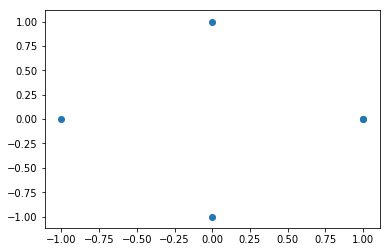

In [171]:
sns.color_palette("husl", 1000)
plt.scatter(skill[:, 0], skill[:, 1])

In [172]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)


In [173]:
cm.hsv(230)

(1.0, 0.0, 0.6727946966917553, 1.0)

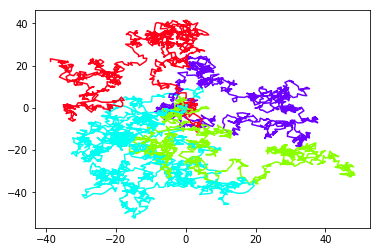

In [175]:
# cp = sns.color_palette("husl", n)
for i in range(n):
    rho, phi = cart2pol(skill[i, 0], skill[i,1])
#     c = cp[i]
    ind = int((phi+np.pi)*255/(2*np.pi))
#     print(ind)
    plt.plot(traj[i, 0, :], traj[i, 1, :], '-', color = cm.hsv(ind))
#     plt.plot([i], [i], 'o',  color = cm.hsv(ind))
# plt.legend()

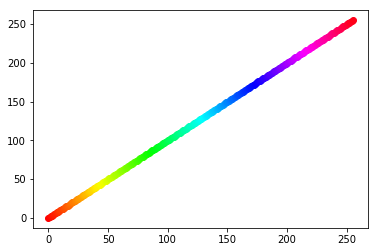

In [159]:
for i in range(256):
    plt.plot([i], [i], 'o',  color = cm.hsv(i))

In [47]:
count = np.array([[0,0,0,0], [0,0,2,0], [1,0,0,0]])
N = 3
H = 4
traj = np.random.randn(N, H)

In [48]:
traj

array([[-0.13429543,  1.07519713,  0.4829698 , -0.56701495],
       [ 1.81349925, -1.51808704, -1.46967104, -0.46956447],
       [ 2.2964658 ,  0.31910381, -0.35764856,  0.46847903]])

In [49]:
count

array([[0, 0, 0, 0],
       [0, 0, 2, 0],
       [1, 0, 0, 0]])

In [50]:
np.repeat(np.arange(N), count.sum(1))

array([1, 1, 2])

In [51]:
print(np.unique(count))

[0 1 2]


In [67]:
traj_new = np.zeros_like(traj)
k = 0
for i in np.unique(count):
    if i > 0:
        for n, h in zip(*np.where(count==i)):
            for _ in range(i):
                traj_new[k, :h+1] = traj[n, :h+1]
                k += 1

In [68]:
traj_new

array([[ 2.2964658 ,  0.        ,  0.        ,  0.        ],
       [ 1.81349925, -1.51808704, -1.46967104,  0.        ],
       [ 1.81349925, -1.51808704, -1.46967104,  0.        ]])

In [69]:
traj

array([[-0.13429543,  1.07519713,  0.4829698 , -0.56701495],
       [ 1.81349925, -1.51808704, -1.46967104, -0.46956447],
       [ 2.2964658 ,  0.31910381, -0.35764856,  0.46847903]])

Text(0,0.5,'Value')

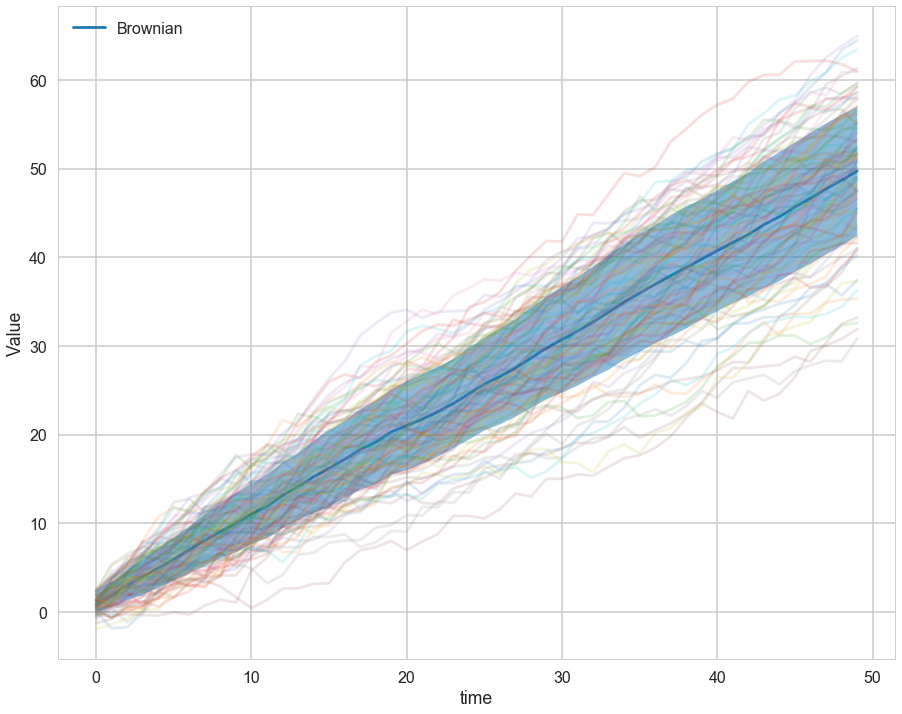

In [137]:
# plt.rcParams['figure.figsize'] = (15.0, 12.0)
sns.set_context("poster")
sns.set_style("whitegrid")

T = 100
x = np.arange(50)
y = np.cumsum(np.ones((50, T))+np.random.randn(50, T), 0)
plt.plot(x, y.mean(1), label='Brownian')
plt.fill_between(x, y.mean(1)-y.std(1), y.mean(1)+y.std(1), alpha=0.5)
for i in range(T):
    plt.plot(x, y[:, i], alpha=0.15)
plt.legend()
plt.xlabel('time')
plt.ylabel('Value')

Text(0,0.5,'Value')

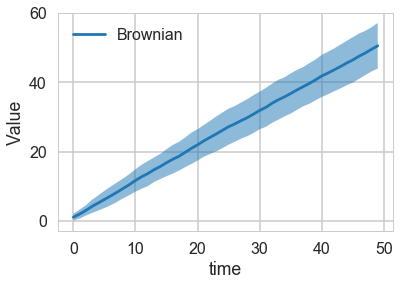

In [129]:
y.shape

(50, 100)

In [122]:
x.reshape(-1, 1).shape

(50, 1)